##LIGHT MILS

## 0. Cloning Repository

In [ ]:
!git clone https://github.com/IP-04/MILS.git

Cloning into 'MILS'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 160 (delta 11), reused 0 (delta 0), pack-reused 125 (from 2)
Receiving objects: 100% (160/160), 4.87 MiB | 18.89 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
%cd MILS

/content/MILS


## 1. Enviroment Setup

In [ ]:
# REMOVE existing torchvision (which was compiled with CUDA 12.4)
%pip uninstall -y torchvision

#  Upgrade pip to avoid compatibility issues
%pip install --upgrade pip

#  Install PyTorch (with CUDA 11.8) + matching Torchvision + Torchaudio
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

#  Core system tools
%pip install ffmpeg opencv-python-headless

#  Core scientific and plotting libraries
%pip install "numpy<2.0" pandas matplotlib

#  ML + Vision + Hugging Face ecosystem
%pip install timm diffusers accelerate transformers

#  MILS-specific dependencies
%pip install open_clip_torch einops sentencepiece protobuf

#  Facebook's PyTorchVideo (required by MILS utils, safe to include even if unused)
%pip install git+https://github.com/facebookresearch/pytorchvideo


Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torchvision>=0.11, which is not installed.
Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 163.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [open_clip_torch]
  Cloning https://github.com/facebookresearch/pytorchvideo to /tmp/pip-req-build-4amzlnp8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo /tmp/pip-req-build-4amzlnp8
  Resolved https://github.com/facebookresearch/pytorchvideo to commit 6cdc929315aab1b5674b6dcf73b16ec99147735f
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 98.7 MB/s eta 0:00:00
  DEPRECATION: Building 'pytorchvideo' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolat

Testing libraries:

In [ ]:
import torch, torchvision
print("PyTorch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("CUDA Available:", torch.cuda.is_available())


PyTorch: 2.7.1+cu118
Torchvision: 0.22.1+cu118
CUDA Available: True


## 2. COCO Image Setup (minimal at first) - not the full dataset

In [ ]:
!mkdir -p /content/data/coco
%cd /content/data/coco

!wget -nc http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -q -o annotations_trainval2014.zip

/content/data/coco
--2025-07-14 01:07:34--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.200, 52.216.214.193, 52.216.108.91, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  59.6MB/s    in 4.5s    

2025-07-14 01:07:39 (53.1 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [ ]:
!ls /content/data/coco/annotations/captions_val2014.json

/content/data/coco/annotations/captions_val2014.json


## 3. Verifying Pipeline functionality

In [ ]:
COCO_IMG_PATH = "data/coco/images/val2014"
OUTPUT_DIR = "outputs/" #to reflect the Colab paths

In [ ]:
# Make sure you're in /content or one level above your coco/ folder
%cd /content/data/coco

# Download COCO annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

# Unzip it
!unzip -q annotations_trainval2014.zip


/content/data/coco
--2025-07-14 01:10:56--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.30.244, 52.217.48.156, 52.217.161.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.30.244|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip.1’

annotations_trainva 100%[===================>] 241.16M  31.8MB/s    in 8.0s    

2025-07-14 01:11:05 (30.1 MB/s) - ‘annotations_trainval2014.zip.1’ saved [252872794/252872794]

replace annotations/instances_train2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace annotations/instances_val2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace annotations/person_keypoints_train2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace annotations/person_keypoints_val2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace annotations/

In [ ]:
#add login part

In [ ]:
#dummy COCO images for testing
import os
from PIL import Image
import numpy as np

# images directory
os.makedirs('/content/data/coco/images/val2014', exist_ok=True)

# Read the annotations to get the image IDs we need
import json
with open('/content/data/coco/annotations/captions_val2014.json', 'r') as f:
    annotations = json.load(f)

# Get unique image IDs
image_ids = sorted(set([ann['image_id'] for ann in annotations['annotations']]))[:200]

print(f"Creating {len(image_ids)} dummy images...")

# Create dummy 224x224 RGB images
for i, img_id in enumerate(image_ids):
    if i % 50 == 0:
        print(f"Created {i} images...")

    # Create a colorful dummy image
    dummy_img = np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8)
    img = Image.fromarray(dummy_img)

    # Save with correct COCO filename format
    filename = f"COCO_val2014_{img_id:012}.jpg"
    img.save(f"/content/data/coco/images/val2014/{filename}")

print("Done! Created dummy images for testing.")

Creating 200 dummy images...
Created 0 images...
Created 50 images...
Created 100 images...
Created 150 images...
Done! Created dummy images for testing.


## 4.Image Captioning Setup


📥 Downloading real COCO images...
🎉 Real COCO images downloaded!

🖼️ Displaying all downloaded images...
Displaying 16 images for visual comparison...


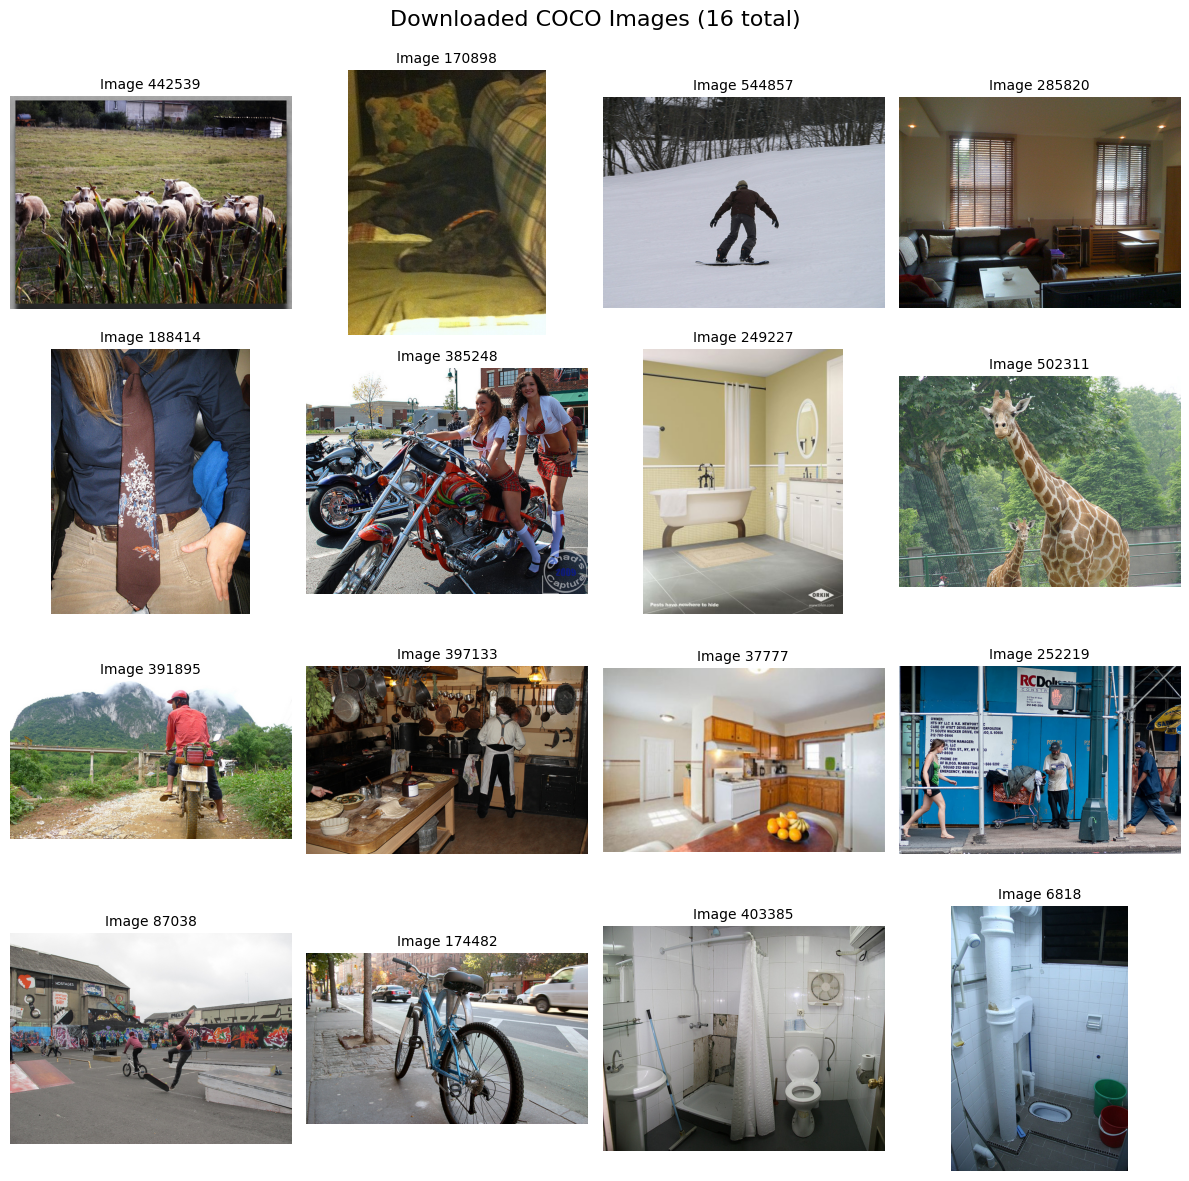

✅ Displayed 16 images in grid format for comparison

🚀 Setup complete! You can now run your image captioning script.
All images are displayed above for visual comparison.


In [ ]:
# ============================================================
# COLAB SETUP - Run this cell before image captioning!
# ============================================================
import os
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import requests
import json

# Fix matplotlib for Colab
matplotlib.use('Agg')
plt.ioff()
plt.rcParams['figure.figsize'] = [10, 8]

# Download real COCO images
print("📥 Downloading real COCO images...")
coco_base = "/content/data/coco"
images_dir = f"{coco_base}/images/val2014"
os.makedirs(images_dir, exist_ok=True)

# Real COCO image IDs - expanded set for better grid display
sample_ids = [442539, 170898, 544857, 285820, 188414, 385248, 249227, 502311,
              391895, 397133, 37777, 252219, 87038, 174482, 403385, 6818]
base_url = "http://images.cocodataset.org/val2014/"

for img_id in sample_ids:
    filename = f"COCO_val2014_{img_id:012d}.jpg"
    image_path = os.path.join(images_dir, filename)

    if not os.path.exists(image_path):
        url = base_url + filename
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                with open(image_path, 'wb') as f:
                    f.write(response.content)
                print(f"✅ Downloaded {filename}")
            else:
                print(f"❌ Failed to download {filename} - Status: {response.status_code}")
        except Exception as e:
            print(f"❌ Failed to download {filename} - Error: {e}")

print("🎉 Real COCO images downloaded!")

def display_images_grid(image_ids, images_path, max_images=16):
    """Display all downloaded images in a grid for comparison"""
    # Configure matplotlib for Colab display
    current_backend = matplotlib.get_backend()
    matplotlib.use('module://ipykernel.pylab.backend_inline')
    plt.ion()

    try:
        n_images = min(len(image_ids), max_images)
        print(f"Displaying {n_images} images for visual comparison...")

        # Determine grid size - aim for roughly square grid
        if n_images <= 4:
            rows, cols = 2, 2
        elif n_images <= 6:
            rows, cols = 2, 3
        elif n_images <= 9:
            rows, cols = 3, 3
        elif n_images <= 12:
            rows, cols = 3, 4
        else:
            rows, cols = 4, 4

        fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
        if n_images == 1:
            axes = [axes]
        elif rows == 1 or cols == 1:
            axes = axes if hasattr(axes, '__len__') else [axes]
        else:
            axes = axes.flatten()

        for i, image_id in enumerate(image_ids[:max_images]):
            # Load image
            image_path = os.path.join(images_path, f"COCO_val2014_{image_id:012d}.jpg")

            try:
                img = Image.open(image_path)
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(f"Image {image_id}", fontsize=10, pad=5)

            except Exception as e:
                axes[i].text(0.5, 0.5, f"Error loading\nImage {image_id}",
                            ha='center', va='center', transform=axes[i].transAxes, fontsize=8)
                axes[i].axis('off')

        # Hide unused subplots
        for i in range(n_images, len(axes)):
            axes[i].axis('off')

        plt.suptitle(f"Downloaded COCO Images ({n_images} total)", fontsize=16, y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.show()

        print(f"✅ Displayed {n_images} images in grid format for comparison")

    except Exception as e:
        print(f"Error displaying images grid: {e}")
    finally:
        # Reset to previous backend
        matplotlib.use(current_backend)
        plt.ioff()

# Create a simple display function for use in your script
def show_image_colab(image_path, title="Image", figsize=(8, 6)):
    """Display image in Colab with proper configuration"""
    # Temporarily switch to inline backend
    current_backend = matplotlib.get_backend()
    matplotlib.use('module://ipykernel.pylab.backend_inline')
    plt.ion()

    try:
        img = Image.open(image_path)
        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error displaying image: {e}")
    finally:
        # Reset to previous backend
        matplotlib.use(current_backend)
        plt.ioff()

# Display all downloaded images in a grid for comparison
print("\n🖼️ Displaying all downloaded images...")
display_images_grid(sample_ids, images_dir)

print("\n🚀 Setup complete! You can now run your image captioning script.")
print("All images are displayed above for visual comparison.")

In [14]:
%cd /content/MILS
!python3 main_image_captioning.py \
  --process 0 \
  --num_processes 1 \
  --batch_size 4 \
  --text_model "Qwen/Qwen2.5-0.5B" \
  --clip_model "ViT-B-32" \
  --pretrained "openai" \
  --iterations 5 \
  --llm_batch_size 4 \
  --requested_number 12 \
  --keep_previous 25 \
  --exploration 0.05 \
  --annotations_path "/content/data/coco/annotations/captions_val2014.json" \
  --images_path "/content/data/coco/images" \
  --output_dir "/content/outputs/qwen_test"

/content/MILS
/content/outputs/qwen_test/imagec_g_Qwen2.5-0.5B_5_0.05_25_12_ViT-B-32_openai_image_captioning_shorter_all
/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(
 🤖 Loading text model: Qwen/Qwen2.5-0.5B
2025-07-14 02:31:56.746361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752460316.773268   22806 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752460316.781329   22806 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already be